In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
from pathlib import Path
import pickle
import rasterio as rio
import random
import matplotlib.dates as mdates
from datetime import datetime
import copy

In [2]:
plt.ion()

In [4]:
def gaussian(x, amp, mu, sig):
    return (
        amp/ (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )
def invgaussian(x, amp, mu, sig):
    return -1*gaussian(x, amp, mu, sig)

In [5]:
def linear(x, theta, c):
    m = math.tan(math.radians(theta))
    return(m*x + c)

In [6]:
def phenocurve(x, theta, c, amp1, mu1, sig1, amp2, mu2, sig2):
    line = linear(x, theta=theta, c=c)
    gaus1 = gaussian(x, amp=amp1, mu=mu1, sig=sig1)
    gaus2 = gaussian(x, amp=amp2, mu=mu2, sig=sig2)
    return(line+gaus1+gaus2)

In [7]:
def sigmoid(x, ctr, wf ):
    """
    wf: Width factor
    ctr: Center
    """
    
    return (1+np.exp(-(x-ctr)/wf))**-1

In [8]:
def invsigmoid(x, ctr, wf):
    
    return 1 - sigmoid(x,ctr,wf)

In [9]:
def testsig(x):
    return(1+np.exp(x))**-1


In [10]:
t = np.arange(-20,20)

<Figure size 640x480 with 0 Axes>

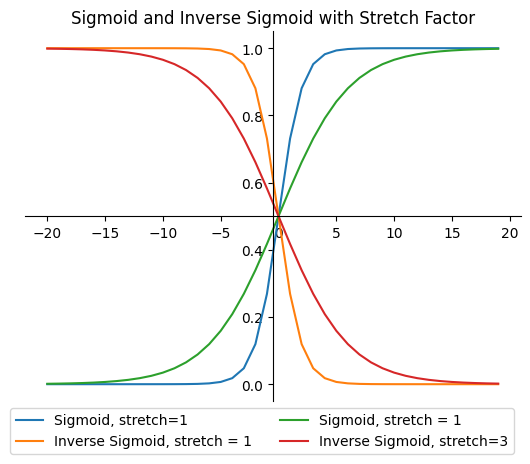

In [11]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(t, sigmoid(t, 0, 1), label='Sigmoid, stretch=1')
ax.plot(t, invsigmoid(t, 0, 1), label='Inverse Sigmoid, stretch = 1')
ax.plot(t, sigmoid(t, 0, 3), label='Sigmoid, stretch = 1')
ax.plot(t, invsigmoid(t, 0 ,3), label='Inverse Sigmoid, stretch=3')
plt.legend(bbox_to_anchor =(1, -0), ncol = 2) 
plt.title('Sigmoid and Inverse Sigmoid with Stretch Factor')
#plt.axhline(0.5)
#plt.axvline(0)
ax.spines[['left', 'bottom']].set_position('center')
ax.spines[['top', 'right']].set_color('none')
# ax.spines[['left', 'bottom']].set_position('center')
# spines.Spines[['top','right']]
plt.show()

In [12]:
x = np.arange(30)

In [33]:
mu = 10; sig = 2 

In [ ]:
plt.plot(x, invgaussian(x,100, mu, sig))

In [ ]:
plt.plot(x, linear(x,-30, 4))

In [ ]:

plt.plot(x,invsigmoid(x, 10,2))

In [13]:
def phenocurve2(x, **kwargs):
    line = linear(x, theta=kwargs['theta'], c = kwargs['c'])
    gauss1 = invgaussian(x, amp=kwargs['amp1'],mu=kwargs['mu1'], sig=kwargs['sigma1'])
    gauss2 = gaussian(x, amp=kwargs['amp2'], mu = kwargs['mu2'], sig = kwargs['sigma2'])
    sigmoid1 = invsigmoid(x, ctr=kwargs['ctr1'], wf=kwargs['wf1'])
    sigmoid2 = sigmoid(x, ctr=kwargs['ctr2'], wf=kwargs['wf2'])
    y = line + gauss1*sigmoid1+gauss2*sigmoid2
    return y
params = {'theta': -0.3,
    'c': 0.3,
    'amp1': 1,
    'mu1': 7,
    'sigma1': 10,
    'ctr1': 7,
    'wf1': 2,
    'amp2': 20,
    'mu2': 15,
    'sigma2': 15,
    'ctr2': 15,
    'wf2': 3,
}


In [14]:
def phenocurve3(x, **kwargs):
    line = linear(x, theta=kwargs['theta'], c = kwargs['c'])
    gauss1 = invgaussian(x, amp=kwargs['amp1'],mu=kwargs['mu1'], sig=kwargs['sigma1'])
    gauss2 = gaussian(x, amp=kwargs['amp2'], mu = kwargs['mu2'], sig = kwargs['sigma2'])
    sigmoid1 = invsigmoid(x, ctr= kwargs['mu1'] - kwargs['offmu1'], wf=kwargs['wf1'])
    sigmoid2 = invsigmoid(x, ctr= kwargs['mu2'] - kwargs['offmu2'], wf=kwargs['wf2'])
    y = line + gauss1*sigmoid1+gauss2*sigmoid2
    return y


In [379]:
allParams = {}

In [406]:
plt.ioff()

In [395]:
plt.ion()

In [591]:
plt.clf()
parameterSet = 10
params2 = {'theta': -0.2,
    'c': 0.15,
    'amp1': 6,
    'mu1': 17,
    'sigma1': 10,
    'offmu1': 0,
    'wf1': 7,
    'amp2': 0,
    'mu2': 20,
    'sigma2': 7,
    'offmu2': 0 ,
    'wf2': 7,
}

Text(0.5, 1.0, 'Parameters 10')

Text(0.5, 1.0, 'Parameters 0')

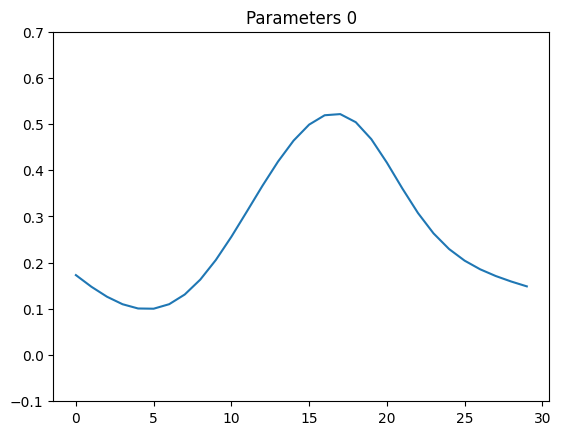

In [39]:
parameterSet = 0
plt.plot(x, phenocurve3(x,**test[parameterSet]))
plt.ylim(-0.1,0.7)
plt.title(f'Parameters {parameterSet}')
#plt.show()


In [592]:
fileName = f"Parameters_{parameterSet}"
dest = r"D:\NewImage\Simulation\ParameterCurves"
destFpath = Path(dest, fileName)
plt.savefig(destFpath)

In [ ]:
allParams[parameterSet] = params2
allParams


In [ ]:
params

In [16]:
dicfolder = r"D:\NewImage\Simulation\ParameterCurves"
dicName = "parameterDict.pkl"
dictfpath = Path(dicfolder, dicName)


In [599]:
with open(dictfpath, 'wb') as pkt:
    pickle.dump(parameterSet, pkt)

In [656]:
import random

In [685]:
sigmaArr = np.zeros(30)+0.01
sigmaArr

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [686]:
result = map(random.gauss,phenocurve3(x,**params2), sigmaArr )

In [ ]:
out = list(result)
out

In [ ]:
plt.clf()
plt.plot(out)
plt.show()

In [111]:
dateFpath = r"D:\Ishan\imageProcessing\TestData\dates2.txt"
tempDates = np.loadtxt(dateFpath, dtype='str')
dates = [datetime.strptime(d, '%Y%m%d').date() for d in tempDates]
print(len(dates))
print(len(x))

30
30


In [118]:
def plotwithRandom(x, sigma, n=100, **kwargs):
    plt.clf()
    plt.ioff()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d/%m/%Y"))
    #sigmaArr = list(map(lambda x: x + sigma*np.random.rand(), np.zeros(len(x))))
    sigmaArr = np.zeros(len(x))+sigma
    print(sigmaArr)
    curve =phenocurve3(x,**kwargs) 
    plt.plot(x, curve)
    i = 0
    while i < n:
        random.seed(np.random.randint(100))
        out = list(map(random.gauss,curve, sigmaArr))
        plt.plot(x, out)
        i+=1
    plt.ylim(-0.1, 0.7)
    plt.xticks(dates, rotation=90)
    plt.show()

In [73]:
def genwithRandom(x, sigma, n=100, **kwargs):
    #sigmaArr = list(map(lambda x: x + sigma*np.random.rand(), np.zeros(len(x))))
    sigmaArr = np.zeros(len(x))+sigma
    print(sigmaArr)
    curve =phenocurve3(x,**kwargs) 
    #plt.plot(x, curve)
    i = 0
    tofill = np.zeros((n,len(x)))
    while i < n:
        random.seed(np.random.randint(100))
        out = list(map(random.gauss,curve, sigmaArr))
        tofill[i] = out
        i+=1
    return tofill

In [ ]:
def createCurve(x, sigma, n, **kwargs):
    sigmaArr = np.zeros(len(x))+sigmaArr
    curve = phenocurve3(x, **kwargs)
    i = 0
    while i<n:
        random.seed(np.random.randint(100))
        out = list(map(random.gauss, curve, sigmaArr))
        i+=1

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05]


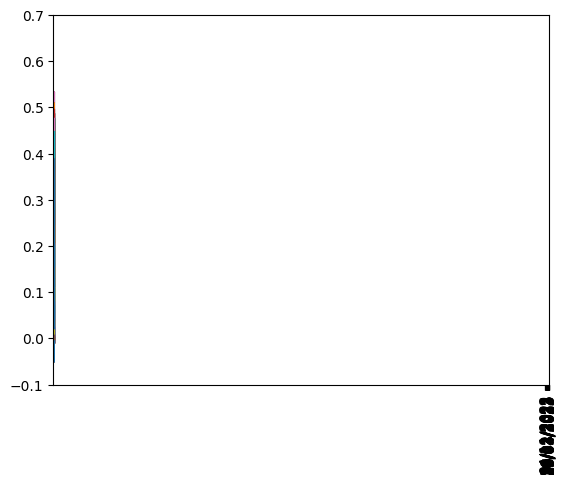

In [119]:
plotwithRandom(x, 0.05, 1000, **out[5])

In [777]:
np.random.rand()

0.4116513409637006

In [8]:
clusterImg = r"D:\Ishan\imageProcessing\TestData\clusterOut\cluster1.tif"
infpath = r"D:\Ishan\imageProcessing\TestData\clusterOut\tenclassimg.tif"
classImg = r"D:\Ishan\imageProcessing\TestData\clusterOut\tenclassimg.tif"

In [21]:
with open(r"D:\NewImage\Simulation\ParameterCurves\parameterDict.pkl", 'rb') as handle:
    params = pickle.load(handle)

In [2]:
dumpfile = r"D:\NewImage\Simulation\ParameterCurves\parameterDict.pkl"

In [3]:
with rio.open(clusterImg) as dst:
    meta = dst.meta

NameError: name 'rio' is not defined

In [6]:
meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 1080,
 'height': 1073,
 'count': 1,
 'crs': CRS.from_epsg(32644),
 'transform': Affine(10.0, 0.0, 278160.0,
        0.0, -10.0, 2031040.0)}

In [47]:
with open(dumpfile, 'wb') as handle:
    pickle.dump(test, handle)

In [6]:
with open(dumpfile, 'rb') as handle:
    out = pickle.load(handle)

In [7]:
out.keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 1])

In [12]:
def fillClusters(clusterFile, paramsDict, imgnum=30, sigma=0.05):
    """
    clusterFile: File path to the image with clusters defined
    paramsDict: Dictionary of parameters used to generate phenotype
    imgnum: Number of images to be stacked
    sigma: Standard Deviation to be applied for 
    """
    x = np.arange(imgnum)
    with rio.open(clusterFile) as dst:
        image = dst.read(1)
        meta = dst.meta
        profile = dst.profile
    inpimg = np.zeros((imgnum, image.shape[0], image.shape[1]))
    for i in paramsDict.keys():
        params = paramsDict[i]
        idxs = np.where(image==i)
        idx_num = len(idxs[0])
        tofill = genwithRandom(x, sigma, n=idx_num, **params)
        for j in range(idx_num):
            inpimg[:,idxs[0][j],idxs[1][j]] = tofill[j]
    return inpimg, profile 

In [ ]:
check = fillClusters(clusterFile=classImg, paramsDict=out)

In [78]:
check.shape

(30, 1073, 1080)

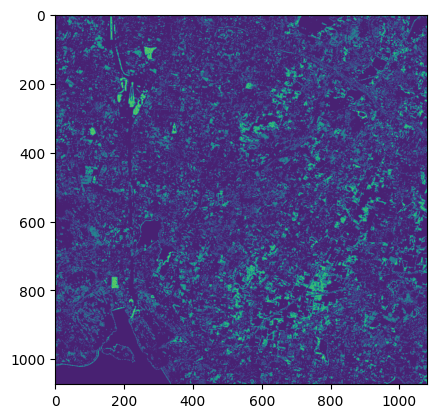

In [81]:
plt.imshow(check[2])

In [84]:
with rio.open(clusterImg) as dst:
    meta = dst.meta

In [85]:
meta.update(count = 30)

In [90]:
with rio.open(r"D:\NewImage\Simulation\TestImages\out.tif", 'w', **meta) as dst:
    dst.write(check)

In [13]:
def saveclusters(outfile, clusterFile, paramsDict, imgnum=30, sigma=0.05):
    check, profile = fillClusters(clusterFile =clusterFile, paramsDict=paramsDict)
    profile.update(count=imgnum)
    with rio.open(outfile, 'w', **profile) as dst:
        dst.write(check)
    print('File written')

In [14]:
outfile = r"D:\NewImage\Simulation\TestImages\simulatedImg_sigma-dot06.tif"
saveclusters(outfile=outfile, clusterFile = infpath, paramsDict=out, sigma=0.06)

NameError: name 'genwithRandom' is not defined